In [65]:
import numpy as np
import xarray as xr
import regionate

import cftime
import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 12})

In [66]:
wmt = xr.open_dataset('../paper/data/baltic_wmb_salt_natv_hourly_for_decompositions.nc')
wmt_newbins = xr.open_dataset('../paper/data/baltic_wmb_salt_natv_hourly_for_decompositions_newbins.nc')
wmt_maps = xr.open_dataset("../paper/data/baltic_wmb_salt_natv_hourly_maps.nc")
transport = xr.open_dataset("../paper/data/baltic_wmb_salt_natv_hourly_boundary_transport.nc").mean("time")

S0_map = wmt_maps.so_l_target.values
S0_map_str = str(np.round(wmt_maps.so_l_target.values, decimals=1))
S0_map_str

S0_psi = transport.so_l_target.values
S0_psi_str = str(np.round(transport.so_l_target.values, decimals=1))

S0_map_str, S0_psi_str

('25.0', '29.0')

In [67]:
## Sign corrections and variable renamings
wmt = wmt.rename_vars({
    "Leibniz_material_derivative": "realized_transformation",
    "kinematic_material_derivative": "kinematic_transformation",
    "process_material_derivative": "material_transformation"
})
mass_budget_vars = [
    "mass_tendency", "mass_bounds", "mass_source", "layer_mass", "convergent_mass_transport"
]

for w in [wmt, wmt_newbins, wmt_maps]:
    for v in w.data_vars:
        if v not in mass_budget_vars:
            w[v] = -1*w[v]

## DELETE THIS CELL IF CALCULATIONS ARE RE-RUN USING NEWER VERSIONS OF XWMT and XWMB

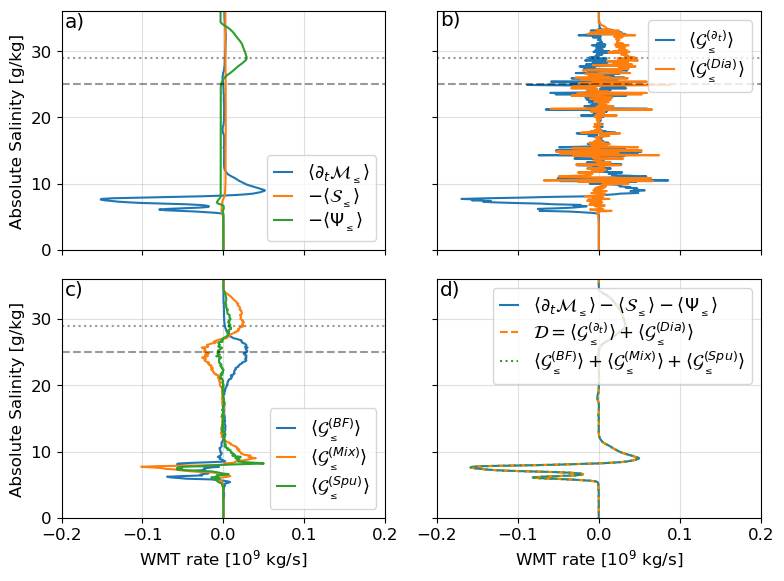

In [64]:
kw = {"labelspacing":0.06, "handlelength":1., "fontsize":13}

plt.figure(figsize=(8,6))

ax = plt.subplot(2,2,1)
(wmt['mass_tendency']*1e-9).mean('time').plot(y="so_l_target", label=r"$\langle \partial_{t} \mathcal{M}_{_{\leq}} \rangle$", color="C0")
(-wmt['mass_source']*1e-9).mean('time').plot(y="so_l_target", label=r"$-\langle \mathcal{S}_{_{\leq}} \rangle$", color="C1")
(-wmt['convergent_mass_transport']*1e-9).mean('time').plot(y="so_l_target", label=r"$-\langle \Psi_{_{\leq}} \rangle$", color="C2")
plt.legend(**kw)
plt.grid(True, alpha=0.4)
plt.ylim(0, 36)
plt.xlim(-0.2, 0.2)
plt.xlabel("");
ax.set_xticklabels([])
plt.ylabel(r"Absolute Salinity [g/kg]")
plt.title("a)", loc="left", y=0.90, x=0.01)
plt.axhline(S0_map, color="k", lw=1.5, alpha=0.4, ls="--")
plt.axhline(S0_psi, color="k", lw=1.5, alpha=0.4, ls=":")

ax = plt.subplot(2,2,2)
(wmt['Eulerian_tendency']*1e-9).mean('time').plot(y="so_l_target", label=r"$\langle \mathcal{G}_{_{\leq}}^{(\partial_{t})} \rangle$", color="C0")
(wmt['diabatic_advection']*1e-9).mean('time').plot(y="so_l_target", label=r"$\langle \mathcal{G}_{_{\leq}}^{(Dia)} \rangle$", color="C1")
plt.legend(loc="upper right", **kw)
plt.grid(True, alpha=0.4)
plt.ylim(0, 36)
plt.xlim(-0.2, 0.2)
plt.ylabel("")
plt.xlabel("");
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title("b)", loc="left", y=0.91, x=0.01)
plt.axhline(S0_map, color="k", lw=1.5, alpha=0.4, ls="--")
plt.axhline(S0_psi, color="k", lw=1.5, alpha=0.4, ls=":")

ax = plt.subplot(2,2,3)
(wmt['boundary_fluxes'].mean('time')*1e-9).plot(y="so_l_target", label=r"$\langle \mathcal{G}_{_{\leq}}^{(BF)} \rangle$", color="C0")
(wmt['diffusion']*1e-9).mean('time').plot(y="so_l_target", label=r"$\langle \mathcal{G}_{_{\leq}}^{(Mix)} \rangle$", color="C1")
(wmt['spurious_numerical_mixing']*1e-9).mean('time').plot(y="so_l_target", label=r"$\langle \mathcal{G}_{_{\leq}}^{(Spu)} \rangle$", color="C2")
plt.legend(loc="lower right", **kw)
plt.grid(True, alpha=0.4)
plt.ylim(0, 36)
plt.xlim(-0.2, 0.2)
plt.ylabel(r"Absolute Salinity [g/kg]")
plt.xlabel(r"WMT rate [$10^{9}$ kg/s]")
plt.title("c)", loc="left", y=0.90, x=0.01)
plt.axhline(S0_map, color="k", lw=1.5, alpha=0.4, ls="--")
plt.axhline(S0_psi, color="k", lw=1.5, alpha=0.4, ls=":")

ax = plt.subplot(2,2,4)
label = r"$\langle \partial_{t} \mathcal{M}_{_{\leq}}\rangle - \langle\mathcal{S}_{_{\leq}} \rangle - \langle\Psi_{_{\leq}} \rangle$"
((wmt['mass_tendency'] - wmt['mass_source'] - wmt['convergent_mass_transport'])*1e-9).mean('time').plot(y="so_l_target", label=label)
label = r"$\mathcal{D} = \langle \mathcal{G}_{_{\leq}}^{(\partial_{t})}\rangle + \langle \mathcal{G}_{_{\leq}}^{(Dia)}\rangle$"
((wmt['Eulerian_tendency'] + wmt['diabatic_advection'])*1e-9).mean('time').plot(y="so_l_target", label=label, ls="--")
label= r"$\langle \mathcal{G}_{_{\leq}}^{(BF)}\rangle + \langle \mathcal{G}_{_{\leq}}^{(Mix)}\rangle + \langle \mathcal{G}_{_{\leq}}^{(Spu)}\rangle$"
((wmt['boundary_fluxes'] + wmt['diffusion'] + wmt['spurious_numerical_mixing'])*1e-9).mean('time').plot(y="so_l_target", label=label, ls=":")
plt.grid(True, alpha=0.4)
plt.legend(loc="upper right", **kw)
plt.ylim(0, 36)
plt.xlim(-0.2, 0.2)
plt.ylabel("")
ax.set_yticklabels([])
plt.title("d)", loc="left", y=0.90, x=0.01)
plt.xlabel(r"WMT rate [$10^{9}$ kg/s]");

plt.tight_layout()
plt.savefig("figures/three_decompositions.png", bbox_inches="tight", dpi=300)

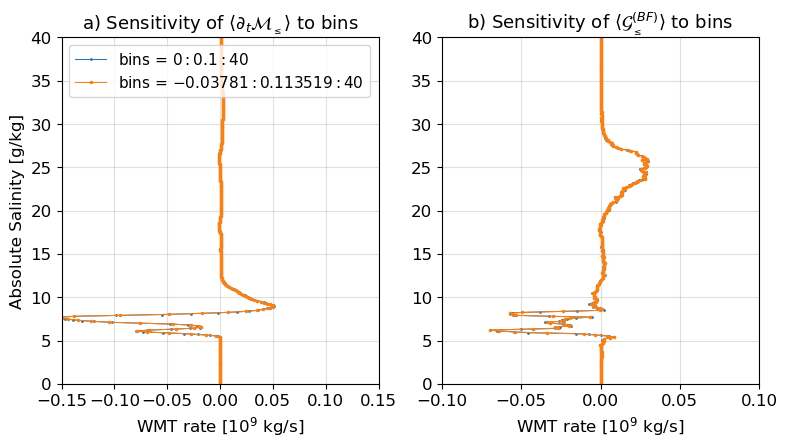

In [60]:
plt.figure(figsize=(9,4.5))

plt.subplot(1,2,1)
(wmt['mass_tendency']*1e-9).mean('time').plot(y="so_l_target", label=r"bins = $0:0.1:40$", marker=".", ls="-", lw=0.75, markersize=2)
(wmt_newbins['mass_tendency']*1e-9).mean('time').plot(y="so_l_target", label=r"bins = $-0.03781:0.113519:40$", marker=".", ls="-", lw=0.75, markersize=3)
plt.grid(True, alpha=0.4)
plt.ylim(0, 40)
plt.xlim(-0.15, 0.15)
plt.ylabel("")
plt.xlabel(r"WMT rate [$10^{9}$ kg/s]")
plt.legend(loc="upper left", fontsize=11)
plt.ylabel(r"Absolute Salinity [g/kg]")
plt.title(r"a) Sensitivity of $\langle \partial_{t} \mathcal{M}_{_{\leq}} \rangle$ to bins", fontsize=13)

plt.subplot(1,2,2)
(wmt['boundary_fluxes']*1e-9).mean('time').plot(y="so_l_target", marker=".", ls="-", lw=0.75, markersize=2)
(wmt_newbins['boundary_fluxes']*1e-9).mean('time').plot(y="so_l_target", marker=".", ls="-", lw=0.75, markersize=3)
plt.grid(True, alpha=0.4)
plt.ylim(0, 40)
plt.xlim(-0.1, 0.1)
plt.ylabel("")
plt.xlabel(r"WMT rate [$10^{9}$ kg/s]")
plt.title(r"b) Sensitivity of $\langle \mathcal{G}_{_{\leq}}^{(BF)} \rangle$ to bins", fontsize=13);

plt.savefig("figures/lambda_bin_sensitivity.png", bbox_inches="tight", dpi=250)

/vftmp/Henri.Drake/pid24840/ipykernel_7684/1198601651.py:50: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pc2, label="seafloor depth [m]", ax=axes[:,:], shrink=0.8)
/vftmp/Henri.Drake/pid24840/ipykernel_7684/1198601651.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pc1, label=r"WMT rate per unit area [$10^{-3}$ kg/m$^{2}/s]$", ax=axes[:,:], shrink=0.8)


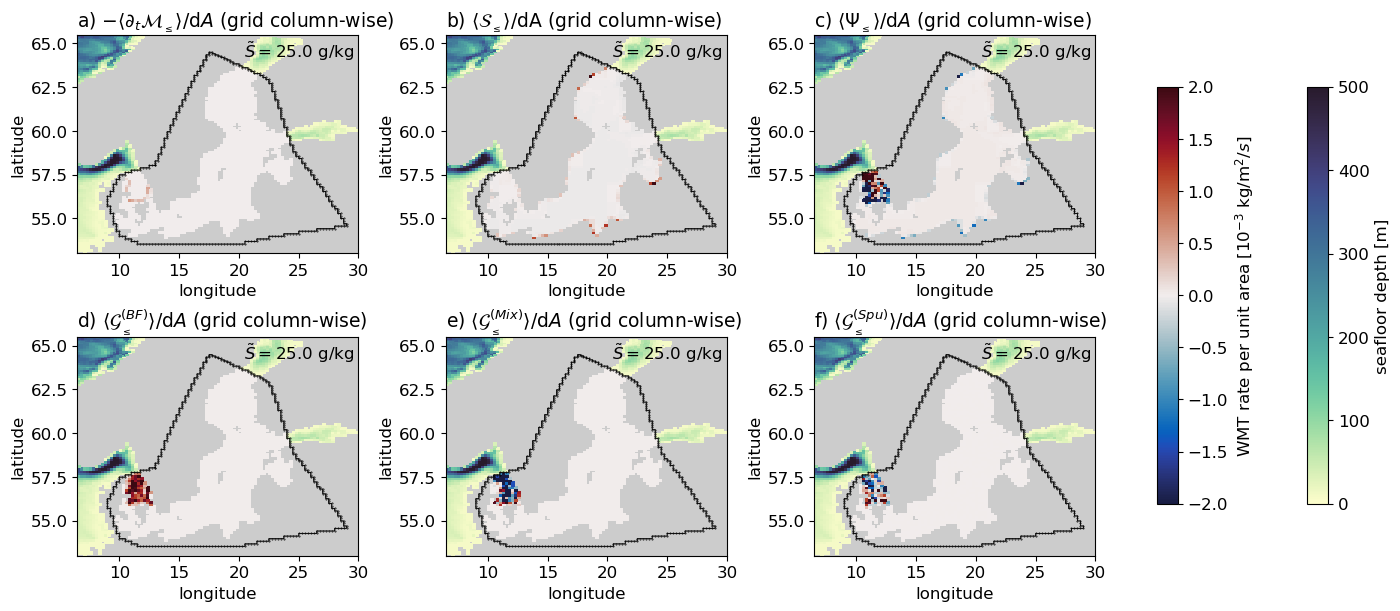

In [61]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.8, 0.8, 0.8, 1))

div_cmap = cmocean.cm.balance.copy()
div_cmap.set_bad((0.6, 0.6, 0.6, 1))

fig, axes = plt.subplots(2,3,figsize=(14,6), layout="constrained")

for ax in axes.flatten():
    ax.set_facecolor(cmap.get_bad())

signs = [-1, 1, 1, 1, 1, 1]
terms = ["mass_tendency", "mass_source", "convergent_mass_transport", "boundary_fluxes", "diffusion", "spurious_numerical_mixing"]
titles = [
    r"a) $-\langle \partial_{t} \mathcal{M}_{_{\leq}} \rangle/$d$A$",
    r"b) $\langle \mathcal{S}_{_{\leq}} \rangle/$dA",
    r"c) $\langle \Psi_{_{\leq}} \rangle/$d$A$",
    r"d) $\langle \mathcal{G}_{_{\leq}}^{(BF)} \rangle/$d$A$",
    r"e) $\langle \mathcal{G}_{_{\leq}}^{(Mix)} \rangle/$d$A$",
    r"f) $\langle \mathcal{G}_{_{\leq}}^{(Spu)} \rangle/$d$A$"
]
for ax, sign, term, title in zip(
    axes.flatten(),
    signs,
    terms,
    titles
):
    pc1 = ax.pcolor(
        wmt_maps.geolon_c,
        wmt_maps.geolat_c,
        (sign*wmt_maps[term]/wmt_maps.areacello*1e3).mean('time').where(wmt_maps.mask & (~np.isnan(wmt_maps.deptho)), np.nan),
        cmap=div_cmap, vmin=-2, vmax=2
    )

    pc2 = ax.pcolor(
        wmt_maps.geolon_c,
        wmt_maps.geolat_c,
        wmt_maps.deptho.where(~wmt_maps.mask, np.nan),
        cmap=cmap,
        vmin=0, vmax=500
    )
    ax.plot(regionate.loop(transport.region_lons), regionate.loop(transport.region_lats), color="k", linewidth=0.6, markersize=0.8, marker=".")
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
    ax.set_xlim(6.5, 30)
    ax.set_ylim(53., 65.5)
    ax.set_title(f"{title} (grid column-wise)", loc="left", fontsize=13.5)
    ax.set_title("")
    ax.annotate(rf"$\tilde{{S}} = {S0_map_str}$ g/kg", xy=(0.985, 0.98), xytext=(0.985, 0.98), ha="right", va="top", xycoords="axes fraction")
fig.colorbar(pc2, label="seafloor depth [m]", ax=axes[:,:], shrink=0.8)
fig.colorbar(pc1, label=r"WMT rate per unit area [$10^{-3}$ kg/m$^{2}/s]$", ax=axes[:,:], shrink=0.8)
plt.savefig("figures/WMT_budget_maps.png", bbox_inches="tight", dpi=300)

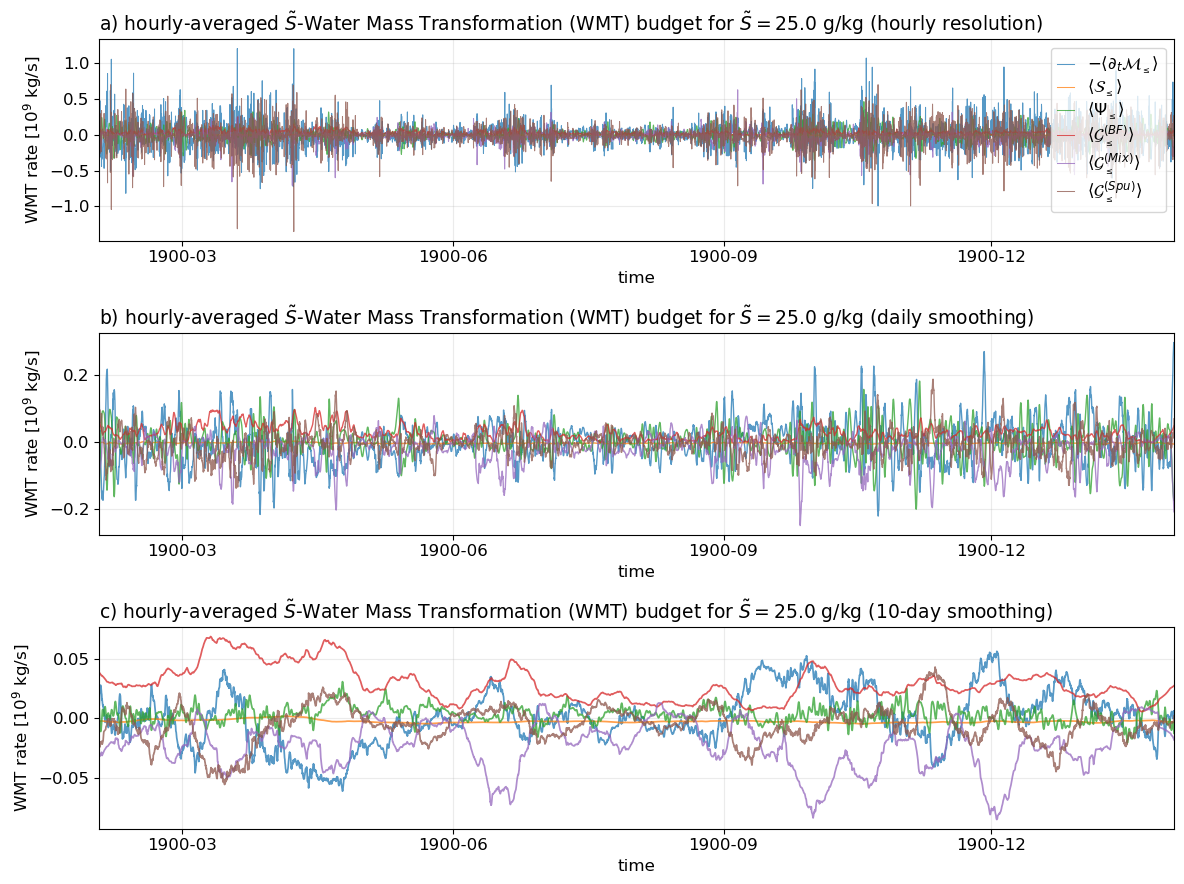

In [62]:
myFmt = mdates.DateFormatter('%b-%d')

fig, axes = plt.subplots(3,1,figsize=(12,9))

titles = [
    r"$-\langle \partial_{t} \mathcal{M}_{_{\leq}} \rangle$",
    r"$\langle \mathcal{S}_{_{\leq}} \rangle$",
    r"$\langle \Psi_{_{\leq}} \rangle$",
    r"$\langle \mathcal{G}_{_{\leq}}^{(BF)} \rangle$",
    r"$\langle \mathcal{G}_{_{\leq}}^{(Mix)} \rangle$",
    r"$\langle \mathcal{G}_{_{\leq}}^{(Spu)} \rangle$"
]
for sign, term, title in zip(signs, terms, titles):
    (sign*wmt_maps[term].sum(["xh", "yh"])*1e-9).plot(ax=axes[0], label=title, alpha=0.75, lw=0.75)
    (sign*wmt_maps[term].sum(["xh", "yh"])*1e-9).rolling({"time":24},min_periods=1,center=True).mean("time").plot(ax=axes[1], label=title, alpha=0.75, lw=1.)
    (sign*wmt_maps[term].sum(["xh", "yh"])*1e-9).rolling({"time":24*10},min_periods=1,center=True).mean("time").plot(ax=axes[2], label=title, alpha=0.75, lw=1.25)
titles = [rf"{p}) hourly-averaged $\tilde{{S}}$-Water Mass Transformation (WMT) budget for $\tilde{{S}} = {S0_map_str}$ g/kg {t}"
          for p,t in zip(["a","b","c"], ["(hourly resolution)", "(daily smoothing)", "(10-day smoothing)"])]
for ax, title in zip(axes, titles):
    ax.set_xlim(wmt_maps.time[0].values, wmt_maps.time[-1].values)
    ax.set_title(title, loc="left", fontsize=13.5)
    ax.set_title("")
    ax.set_xlabel("time")
    ax.set_ylabel(r"WMT rate [$10^{9}$ kg/s]")
    ax.grid(True, alpha=0.25)
axes[0].legend(loc="upper right", handlelength=1., labelspacing=0.09)
fig.tight_layout()
plt.savefig("figures/WMT_budget_timeseries.png", bbox_inches="tight", dpi=300)

/vftmp/Henri.Drake/pid24840/ipykernel_7684/4205383799.py:14: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(pc, ax=ax, label="seafloor depth [m]")


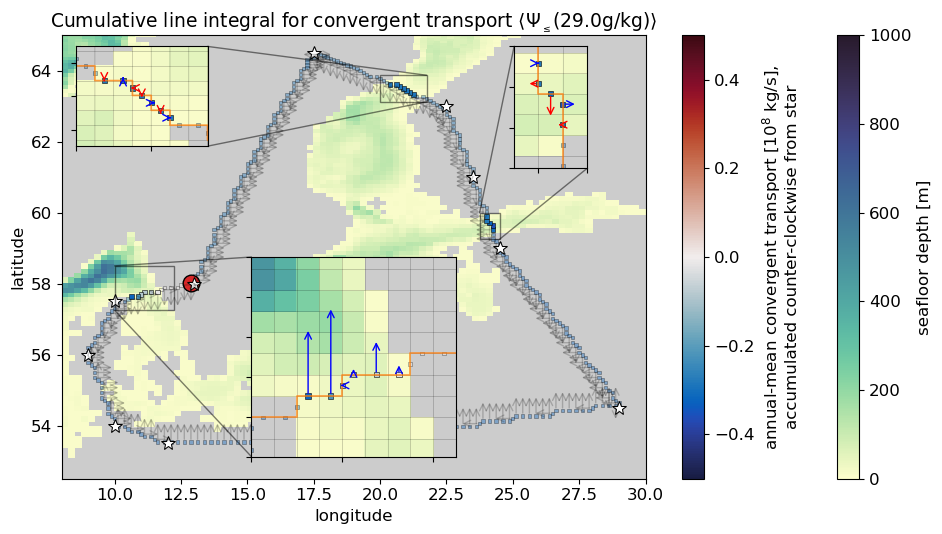

In [63]:
deep_cmap = cmocean.cm.deep.copy()
deep_cmap.set_bad((0.8, 0.8, 0.8))

fig, ax = plt.subplots(figsize=(10, 5.5))
ax.set_facecolor(deep_cmap.get_bad())
pc = ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
plt.colorbar(pc, ax=ax, label="seafloor depth [m]")

ax.plot(
    transport.convergent_transport.lon_sect[0],
    transport.convergent_transport.lat_sect[0],
    "C3o",
    markersize=12,
    markeredgecolor="black",
    markeredgewidth=1
)

# vertices of polygon
lons = np.array([13, 10, 9.0, 10., 12, 20.,  29., 24.5, 23.5, 22.5, 17.5])
lats = np.array([58, 57.5, 56, 54, 53.5, 53.5, 54.5,  59.,  61.,  63., 64.5])
ax.plot(lons, lats, color="white", marker="*", linewidth=0, markeredgecolor="black", markeredgewidth=0.75, markersize=10)


for p in transport.convergent_transport:
    ax.annotate(
        text="",
        xy=(p.lon_sect.values +p.sign.values*(p.dir.values=="U")*1.5*0.5, p.lat_sect.values +p.sign.values*(p.dir.values=="V")*1.5*0.4),
        xytext=(p.lon_sect.values, p.lat_sect.values),
        arrowprops=dict(arrowstyle="->", facecolor='black', alpha=0.2)
    )

sc = ax.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-8,
    marker="s",
    s = 6,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = ax.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-8,
    marker="s",
    s = 11,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.4,
)

plt.colorbar(sc, label="annual-mean convergent transport [$10^{8}$ kg/s],\n"+r"accumulated counter-clockwise from star")
plt.xlim(8,30)
plt.ylim(52.5, 65)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(rf"Cumulative line integral for convergent transport $\langle \Psi_{{ _{{\leq}} }} ({S0_psi_str} $g/kg$) \rangle$", fontsize=13.5);

###
# 1st inset axes
x1, x2, y1, y2 = 10.0, 12.25, 57.25, 58.5
axins = ax.inset_axes(
    [0.325, 0.05, 0.35, 0.45],
    xlim=(x1,x2), ylim=(y1,y2), xticklabels=[], yticklabels=[]
)
axins.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
for xq in wmt_maps.xq:
    axins.plot(
        wmt_maps.geolon_c.sel(xq=xq),
        wmt_maps.geolat_c.sel(xq=xq),
        color="k", alpha=0.25, lw=0.5
    )
for yq in wmt_maps.yq:
    axins.plot(
        wmt_maps.geolon_c.sel(yq=yq),
        wmt_maps.geolat_c.sel(yq=yq),
        color="k", alpha=0.25, lw=0.5
    )
axins.plot(transport.region_lons, transport.region_lats, "C1-", lw=1.25, alpha=0.75)

trans_max = np.abs(transport.convergent_transport).max()
scale_arrows = 2.
for p in transport.convergent_transport:
    scale = p/trans_max
    color = "r" if p>0 else "b"
    if np.abs(scale) > 1e-3:
        axins.annotate(
            text="",
            xy=(p.lon_sect.values +scale*p.sign.values*(p.dir.values=="U")*scale_arrows*0.6*0.35, p.lat_sect.values +scale*p.sign.values*(p.dir.values=="V")*scale_arrows*0.4*0.7),
            xytext=(p.lon_sect.values, p.lat_sect.values),
            arrowprops=dict(arrowstyle="->", color=color, alpha=1)
        )

sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-8,
    marker="s",
    s = 8,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-8,
    marker="s",
    s = 14,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.4,
)
axins.set_facecolor(deep_cmap.get_bad())
ax.indicate_inset_zoom(axins, edgecolor="black")

###
# 2nd inset axes
x1, x2, y1, y2 = 23.75, 24.5, 59.25, 60
axins = ax.inset_axes(
    [0.775, 0.7, 0.125, 0.275],
    xlim=(x1,x2), ylim=(y1,y2), xticklabels=[], yticklabels=[]
)
axins.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
for xq in wmt_maps.xq:
    axins.plot(
        wmt_maps.geolon_c.sel(xq=xq),
        wmt_maps.geolat_c.sel(xq=xq),
        color="k", alpha=0.25, lw=0.5
    )
for yq in wmt_maps.yq:
    axins.plot(
        wmt_maps.geolon_c.sel(yq=yq),
        wmt_maps.geolat_c.sel(yq=yq),
        color="k", alpha=0.25, lw=0.5
    )
axins.plot(transport.region_lons, transport.region_lats, "C1-", lw=1.25, alpha=0.75)

trans_max = np.abs(transport.convergent_transport).max()
scale_arrows = 2.
for p in transport.convergent_transport:
    scale = p/trans_max
    color = "r" if p>0 else "b"
    if np.abs(scale) > 1e-3:
        axins.annotate(
            text="",
            xy=(p.lon_sect.values +scale*p.sign.values*(p.dir.values=="U")*scale_arrows*0.6*0.35, p.lat_sect.values +scale*p.sign.values*(p.dir.values=="V")*scale_arrows*0.4*0.7),
            xytext=(p.lon_sect.values, p.lat_sect.values),
            arrowprops=dict(arrowstyle="->", color=color, alpha=1)
        )

sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-8,
    marker="s",
    s = 8,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-8,
    marker="s",
    s = 14,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.4,
)
axins.set_facecolor(deep_cmap.get_bad())
ax.indicate_inset_zoom(axins, edgecolor="black")

###
# 3rd inset axes
x1, x2, y1, y2 = 20, 21.75, 63.125, 63.875
axins = ax.inset_axes(
    [0.025, 0.75, 0.225, 0.225],
    xlim=(x1,x2), ylim=(y1,y2), xticklabels=[], yticklabels=[]
)
axins.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
for xq in wmt_maps.xq:
    axins.plot(
        wmt_maps.geolon_c.sel(xq=xq),
        wmt_maps.geolat_c.sel(xq=xq),
        color="k", alpha=0.25, lw=0.5
    )
for yq in wmt_maps.yq:
    axins.plot(
        wmt_maps.geolon_c.sel(yq=yq),
        wmt_maps.geolat_c.sel(yq=yq),
        color="k", alpha=0.25, lw=0.5
    )
axins.plot(transport.region_lons, transport.region_lats, "C1-", lw=1.25, alpha=0.75)

trans_max = np.abs(transport.convergent_transport).max()
scale_arrows = 2.
for p in transport.convergent_transport:
    scale = p/trans_max
    color = "r" if p>0 else "b"
    if np.abs(scale) > 1e-3:
        axins.annotate(
            text="",
            xy=(p.lon_sect.values +scale*p.sign.values*(p.dir.values=="U")*scale_arrows*0.6*0.35, p.lat_sect.values +scale*p.sign.values*(p.dir.values=="V")*scale_arrows*0.4*0.7),
            xytext=(p.lon_sect.values, p.lat_sect.values),
            arrowprops=dict(arrowstyle="->", color=color, alpha=1)
        )

sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-8,
    marker="s",
    s = 8,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-8,
    marker="s",
    s = 14,
    cmap=cmocean.cm.balance,
    vmin = -0.5,
    vmax = 0.5,
    edgecolor="k",
    linewidth=0.4,
)
axins.set_facecolor(deep_cmap.get_bad())
ax.indicate_inset_zoom(axins, edgecolor="black")

##
plt.tight_layout();
plt.savefig("figures/convergent_mass_transport.png", bbox_inches="tight", dpi=300)